In [1]:
from model import AE_lin, train_epoch, test_epoch
from utils import plot_ae_outputs

import torch
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms

In [2]:
device = "mps" if torch.backends.mps.is_available() else "cpu"     # change to your device
device = torch.device(device)
print(f"Using device: {device}")

Using device: mps


In [3]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])   #transforms.Normalize((0.5,), (0.5,)

batch_size=32

train_dataset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)

train_targets = train_dataset.targets
test_targets = test_dataset.targets

train_indices = list(range(9000))
test_indices = list(range(1000))

train_dataset = torch.utils.data.Subset(train_dataset, train_indices)    # downsampling
test_dataset = torch.utils.data.Subset(test_dataset, test_indices)

train_data, val_data = random_split(train_dataset, [8000, 1000])

train_loader = DataLoader(train_data, batch_size=batch_size)       # 8000
valid_loader = DataLoader(val_data, batch_size=batch_size)         # 1000
test_loader = DataLoader(test_dataset, batch_size=batch_size)      # 1000

In [4]:
loss_fn = torch.nn.MSELoss()
lr= 0.0003

torch.manual_seed(0)
latent_size = 64

model = AE_lin(encoded_space_dim=latent_size,fc2_input_dim=128)

optim = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-05)

model.to(device)

AE_lin(
  (encoder_cnn): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (6): ReLU(inplace=True)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (encoder_lin): Sequential(
    (0): Linear(in_features=288, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder_lin): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=288, bias=True)
    (3): ReLU(inplace=True)
  )
  (unflatten): Unflatten(dim=1, unflattened_size=(32, 3, 3))
  (decoder_conv): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(3

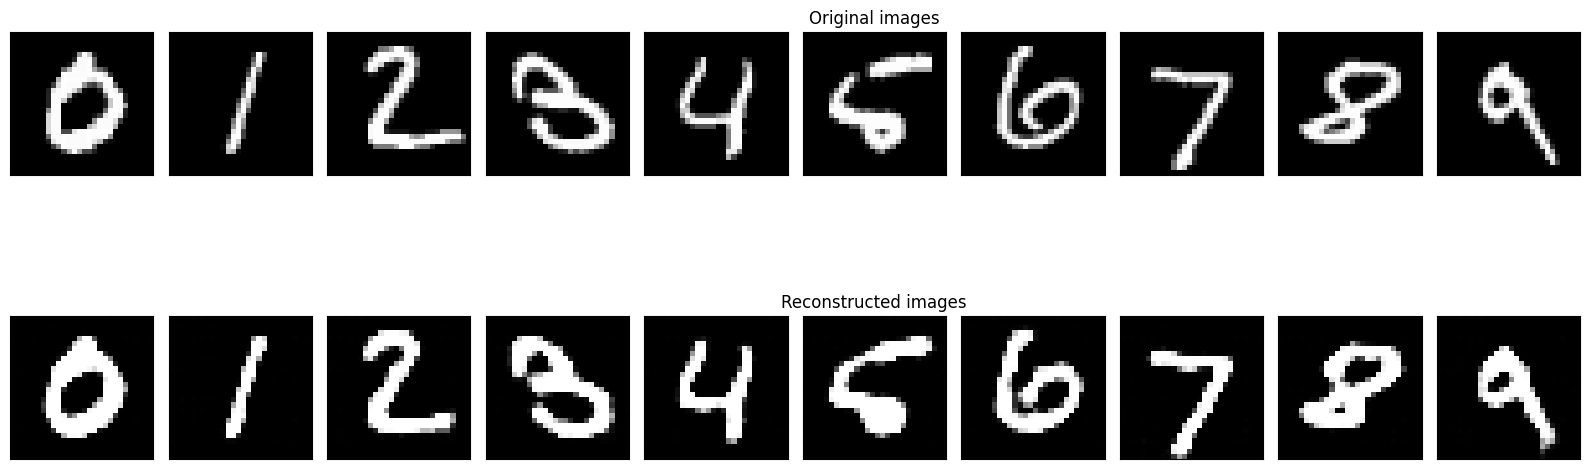

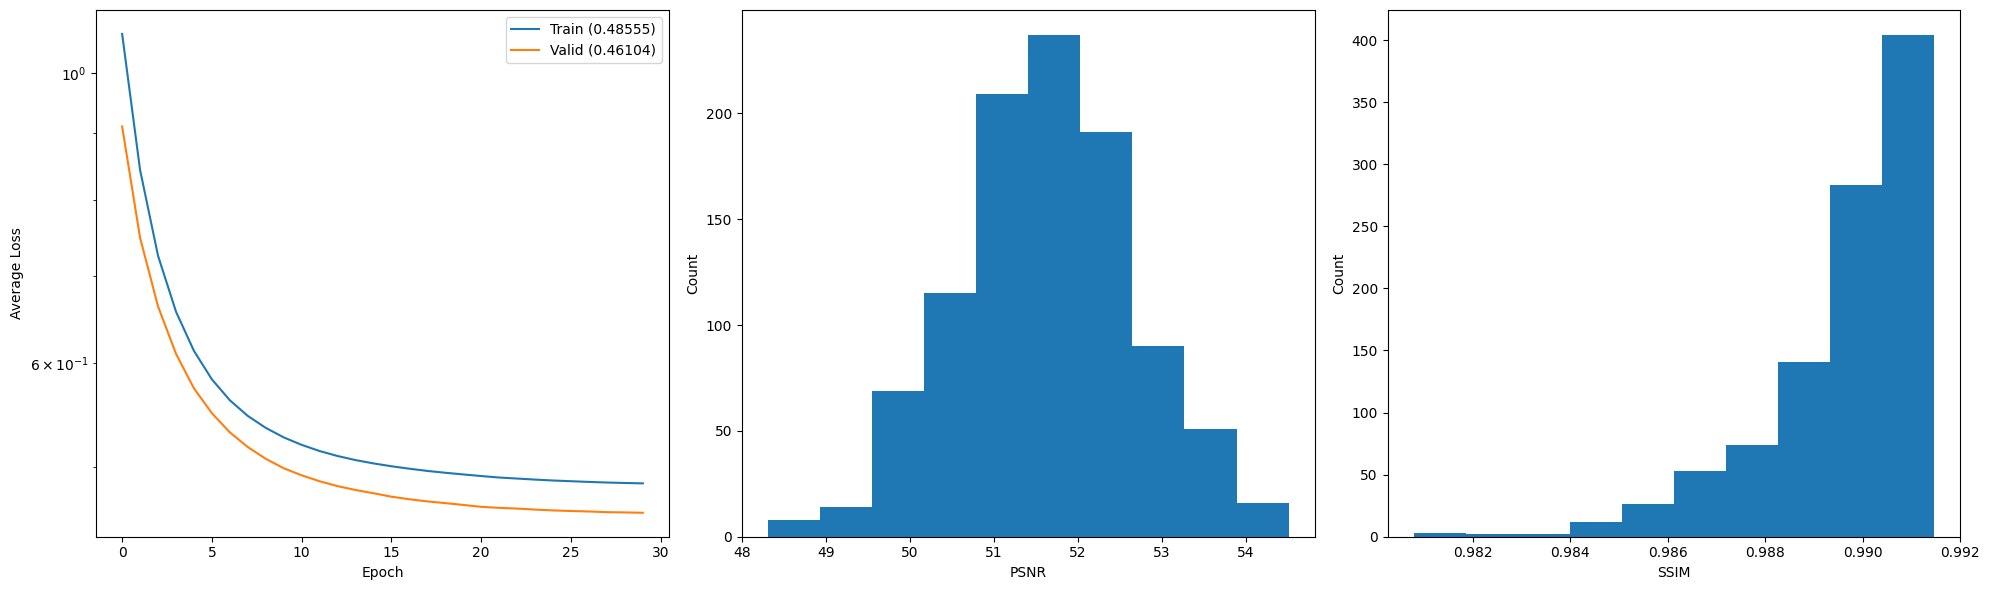

In [5]:
num_epochs = 30
diz_loss = {'train_loss':[],'val_loss':[]}
for epoch in range(num_epochs):
   train_loss = train_epoch(model,device,train_loader,loss_fn,optim)
   val_loss = test_epoch(model,device,valid_loader,loss_fn)
   diz_loss['train_loss'].append(train_loss)
   diz_loss['val_loss'].append(val_loss)
   plot_ae_outputs(model,diz_loss,device,test_dataset,test_targets , test_indices, key='MNIST', n=10)

In [6]:
test_epoch(model,device,test_loader,loss_fn).item()

0.4610382616519928